In [5]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram


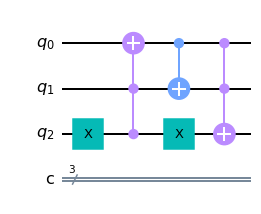

In [7]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[2])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.draw(output='mpl')

In [ ]:
#TODO 1: make sanity check - for every input get desiered out
#TODO 2: 